## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Check the data and format
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Check the data and format
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_full_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_full_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_full_df["Mouse ID"].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_full_df.loc[mouse_full_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_full_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep = "last")

In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_data["Mouse ID"].nunique()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using dvt to respresent the Drug v. Tumor Volume relationship
dvt_mean = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() 
dvt_median = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() 
dvt_var = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var() 
dvt_stdev = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std() 
dvt_sem = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() 

In [10]:
# Assemble the resulting series into a single summary dataframe.
dvt_summary_df = pd.DataFrame({
    "Tumor Volume Mean by Drug": dvt_mean,
    "Tumor Volume Median by Drug": dvt_median,
    "Tumor Volume Variance by Drug": dvt_var,
    "Tumor Volume St. Dev by Drug": dvt_stdev,
    "Tumor Volume SEM by Drug": dvt_sem

})

dvt_summary_df

,Tumor Volume Mean by Drug,Tumor Volume Median by Drug,Tumor Volume Variance by Drug,Tumor Volume St. Dev by Drug,Tumor Volume SEM by Drug
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

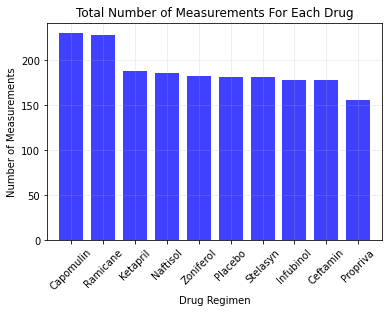

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_data['Drug Regimen'].value_counts().plot(kind='bar', color='b', align='center', alpha=.75,
                                                    rot=45, width=.75)
plt.grid(alpha=.25)
plt.xlim(-0.75, len(mouse_data['Drug Regimen'].value_counts())-0.25)
plt.title("Total Number of Measurements For Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

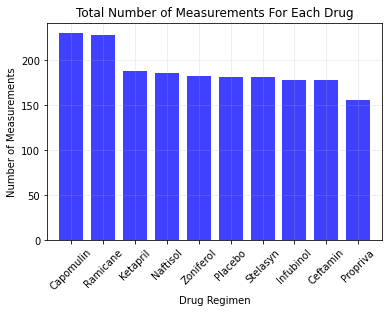

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements = mouse_data['Drug Regimen'].value_counts()
x_axis = list(total_measurements.index.values)

plt.bar(x_axis, total_measurements, color='b', align='center', alpha=.75, width=.75)
plt.grid(alpha=.25)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xticks(x_axis, rotation=45)
plt.title("Total Number of Measurements For Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

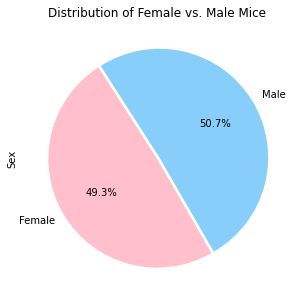

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_data["Sex"].value_counts().plot(kind='pie', startangle=-60, colors=['lightskyblue', 'pink'],
                                            autopct="%1.1f%%", labels=["Male", "Female"], explode=[.025,0],
                                            title="Distribution of Female vs. Male Mice", figsize=[5, 5])
plt.show()

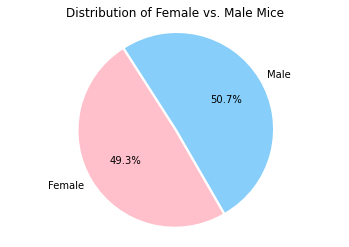

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice = mouse_data['Sex'].value_counts()
labels= mouse_data['Sex'].unique()
colors= ['lightskyblue', 'pink']
explode= [.025, 0]

plt.pie(gender_mice, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=-60)
plt.axis('equal')
plt.title("Distribution of Female vs. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = mouse_data.loc[(mouse_data['Drug Regimen']=='Capomulin') | 
                               (mouse_data['Drug Regimen']=='Ramicane') |
                               (mouse_data['Drug Regimen']=='Infubinol') | 
                               (mouse_data['Drug Regimen']=='Ceftamin')]

drug_regimens.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
max_time = drug_regimens.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_regimens = pd.merge(drug_regimens, max_time, how='right', on=['Mouse ID', 'Timepoint'])
drug_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = drug_regimens['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:    
    tumor_vol_data.append(drug_regimens.loc[drug_regimens['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
     
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# Check values by printing
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"the interquartile range of tumor volumes is {iqr}")
print(f"The median of tumor volumes is {quartiles[.5]}")
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

The lower quartile of tumor volumes is: 37.187743802499995
The upper quartile of tumor volumes is: 59.930261755000004
the interquartile range of tumor volumes is 22.74251795250001
The median of tumor volumes is 45.0
Values below 3.0739668737499812 could be outliers
Values above 94.04403868375002 could be outliers


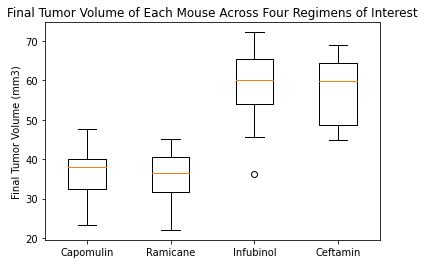

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

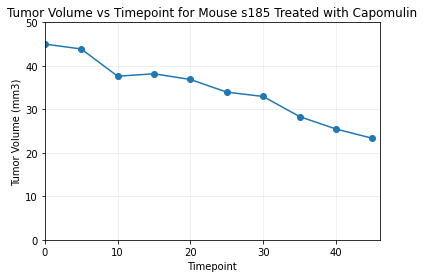

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin']

# Mouse that was treated with Capomulin
treated_mouse = "s185"
selected_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == treated_mouse]

plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], marker='o')
plt.grid(alpha=.25)
plt.xlim(0, max(selected_mouse["Timepoint"]) + 1)
plt.ylim(0, max(selected_mouse["Tumor Volume (mm3)"]) + 5)
plt.title(f"Tumor Volume vs Timepoint for Mouse {treated_mouse} Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

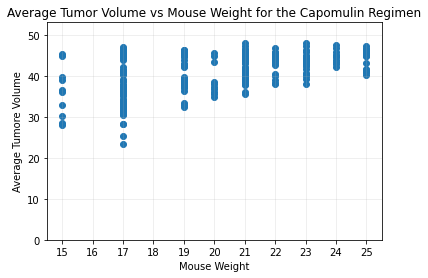

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_mouse['Weight (g)'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title("Average Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumore Volume")
plt.ylim(0, max(capomulin_mouse["Tumor Volume (mm3)"])+5)
plt.xticks(np.arange(min(capomulin_mouse['Weight (g)']), max(capomulin_mouse['Weight (g)'])+1, 1.0))
plt.grid(alpha=.25)
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_mouse["Weight (g)"]
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation coefficient between mouse weight and tumor volume is {round(correlation[0], 2)}")

The correlation coefficient between mouse weight and tumor volume is 0.53


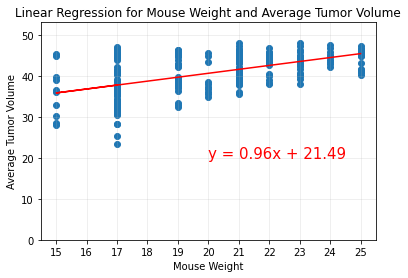

In [30]:
# Plot the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(20,20),fontsize=15,color='red')
plt.grid(alpha=.25)
plt.ylim(0, max(capomulin_mouse["Tumor Volume (mm3)"]) + 5)
plt.xticks(np.arange(min(capomulin_mouse['Weight (g)']), max(capomulin_mouse['Weight (g)'])+1, 1.0))
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Linear Regression for Mouse Weight and Average Tumor Volume')
plt.show()